In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
import tese_func
from myds import enrichr_func, plot
import pickle
import json
import requests
from cairosvg import svg2png
import os
from IPython.display import Image

data = pd.read_csv("data/data_ipet.csv")
id="id"
clin = 766
target = "ipet2"

reps = {"I A": 1, "I B":2, "II A":3, "II B":4, "III A":5, "III B":6, "IV A":7, "IV B":8}
data["stage"] = data["stage"].replace(reps)


palette = ["#4E89AE", "#43658B", "#ED6663", "#FFA372"]
print(data.shape)
data.head()

(103, 771)


,id,A2M,ABCB1,ABCF1,ABL1,ADA,ADORA2A,AGK,AICDA,AIRE,...,ZC3H14,ZKSCAN5,ZNF143,ZNF205,ZNF346,gender,age,stage,lmr>2.1,ipet2
0,GSM3860476,10.61,7.83,10.09,8.34,8.48,8.90,7.30,0.36,6.44,...,8.93,5.38,7.88,3.59,7.15,0,18,3,1,0
1,GSM3860477,11.14,11.88,1.70,10.60,10.58,11.45,10.90,1.70,11.42,...,10.27,8.77,1.70,1.70,10.75,1,51,3,1,0
2,GSM3860478,9.91,9.94,9.04,8.60,9.67,9.56,9.51,0.16,9.43,...,9.51,7.68,7.58,2.63,8.62,1,38,3,0,0
3,GSM3860479,11.89,8.56,9.99,8.47,9.54,8.61,8.10,1.35,6.68,...,9.69,6.36,8.91,1.35,8.25,0,50,8,0,0
4,GSM3860480,9.69,7.15,9.27,8.29,8.39,8.14,7.17,0.66,5.43,...,9.40,5.72,7.79,5.07,7.43,1,22,3,1,0


![title](images/exploratory/enrichr_scores.png)

# 1º Feature Selection

In [2]:
selgenes = ["CXCL2", "CXCL3", "CCL18", "TREM1", "SAA1", "PLAU", "FN1",
            "SPP1", "ITGA5", "CD9", "LRP1", "THBS1", "VEGFA"]
clinic_var = ["gender", "age","stage", "lmr>2.1"]

print("-"*80)
union1, inter1, _, _ = tese_func.feat_select_miwi(threshold=0.1, prev_sel=selgenes)

#remover vars clinicas
union1_g = [x for x in union1 if x not in clinic_var]
inter1_g = [x for x in inter1 if x not in clinic_var]
print("-"*80)

--------------------------------------------------------------------------------
Features mi with p-value <= 0.1: 155
Features wi with p-value <= 0.1: 132

Union of features from MI and Wilcoxon has len: 250 
Intersection of features from MI and Wilcoxon has len: 37 

Previously selected in union: ['CXCL2', 'ITGA5', 'VEGFA', 'CD9', 'THBS1', 'FN1', 'CXCL3', 'SAA1', 'LRP1']
Previously selected in intersection: []
--------------------------------------------------------------------------------


In [3]:
titles = ["Union of MI and WI with p-value=0.1"]
titles = []

sets = {"Union MIWI 0.1": union1_g}

score = "c_score"

img_path = "./images/bio/"

## Pathway - KEGG_2019_Human

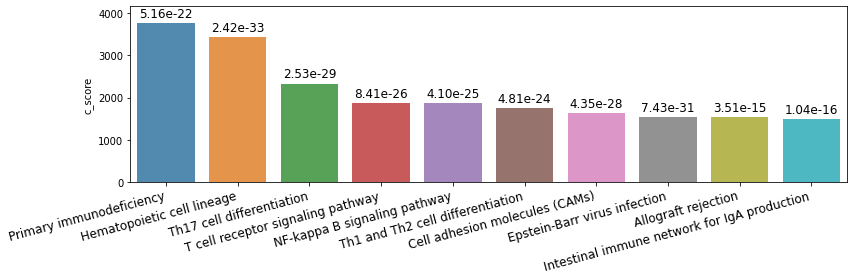

/home/andre/Desktop/tese/exploratory/myds/enrichr_func.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["over_genes"] = table["over_genes"].map(sorted).copy()


In [4]:
lib = 'KEGG_2019_Human'
datasets = enrichr_func.term_graphics(sets, lib, titles=titles, orient="v", return_data= True, verbose=1,
                                     score=score, bar_score="adjusted_p_value", 
                                      figsize=(12,4), rot=15, font_size=12, save=img_path+"bio_fs1kegg")

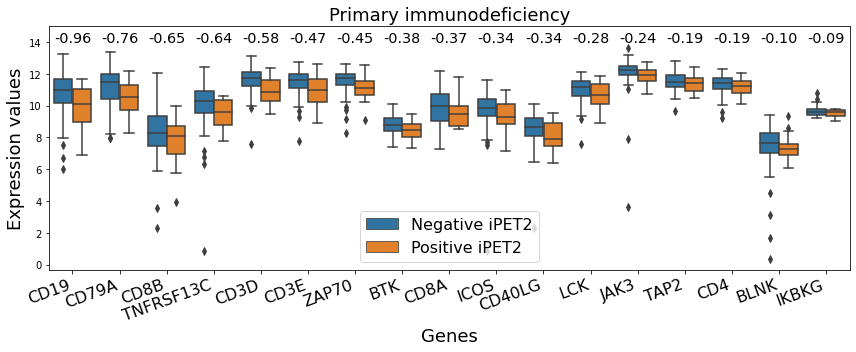

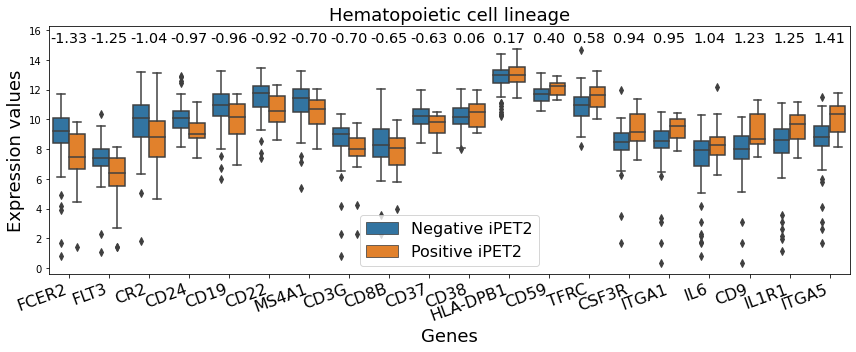

In [5]:
d = datasets["Union MIWI 0.1"]
n_terms = 2
#enrichr_func.scatter_genes_term(d, data, target, n_terms, diag_line=True, exp=False, use_axes=True)
#enrichr_func.fc_genes_term(d, data, target, n_terms)
#leg_size=12, title_size=16, axis_size=18, figsize=(12,4), max_genes=50):
enrichr_func.boxplot_genes_term(d, data, target, n_terms, figsize=(12,5), max_genes=20,
                               leg_size=16, xtick_size=16, title_size=18)

## Bilogical Process - GO_Biological_Process_2018

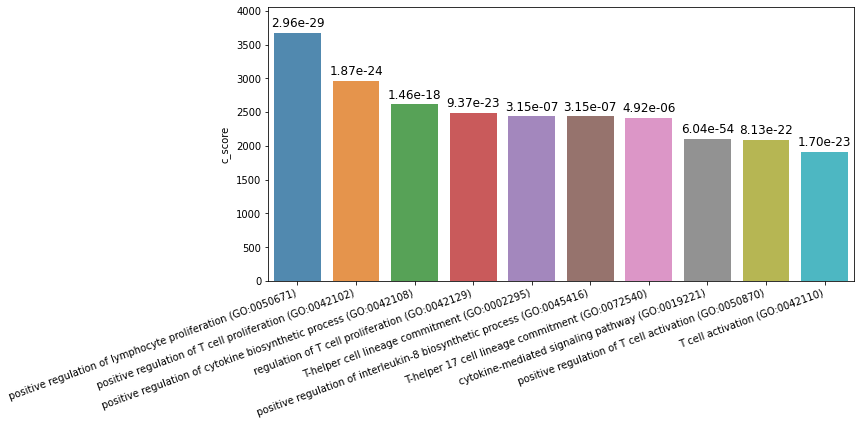

/home/andre/Desktop/tese/exploratory/myds/enrichr_func.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["over_genes"] = table["over_genes"].map(sorted).copy()


In [22]:
lib = "GO_Biological_Process_2018"
datasets = enrichr_func.term_graphics(sets, lib, titles=titles, orient="v", return_data= True, verbose=1,
                                      score=score, bar_score="adjusted_p_value")

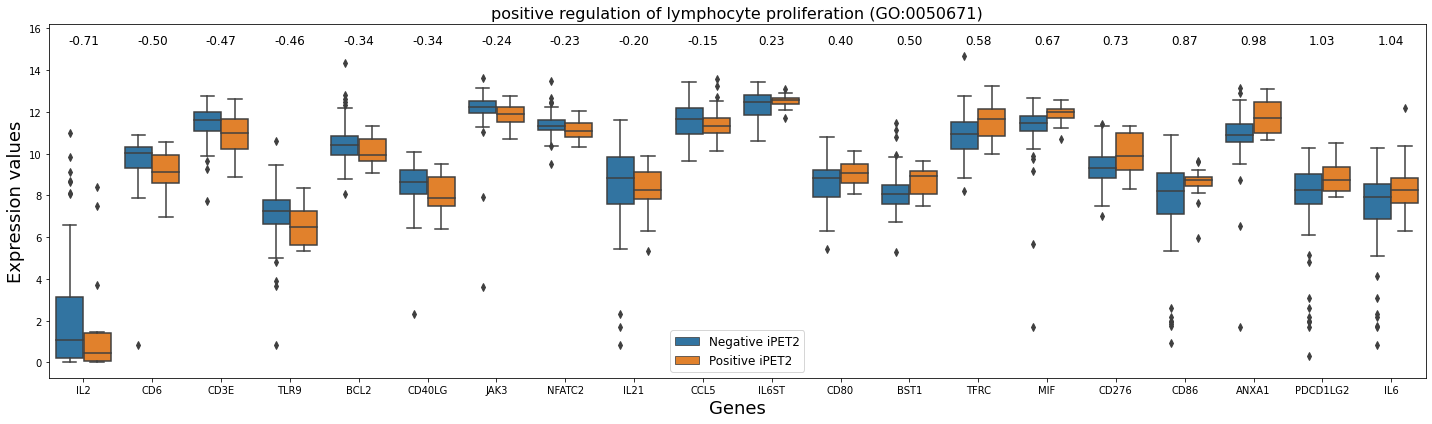

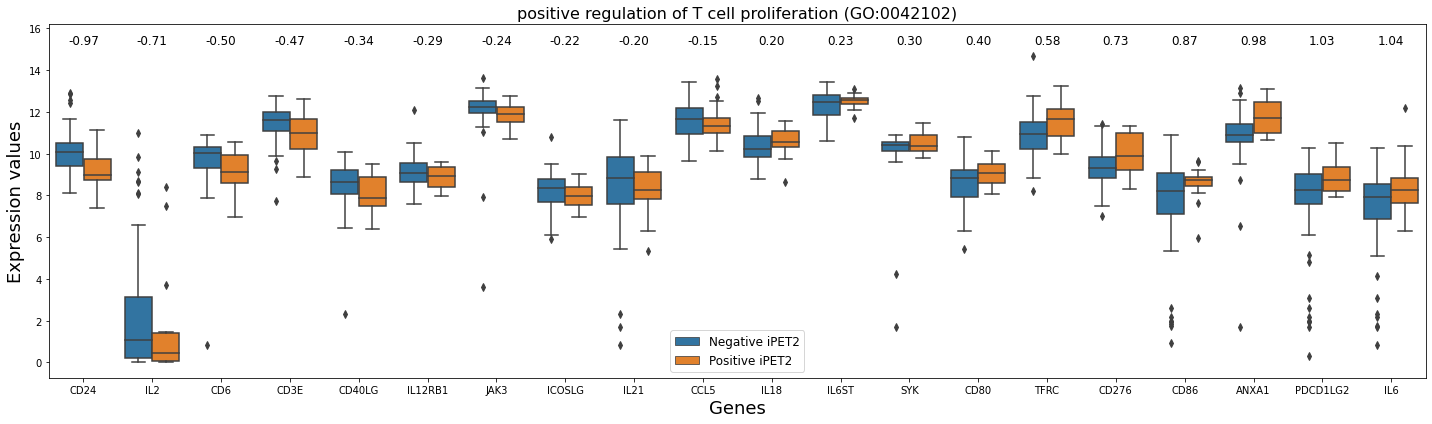

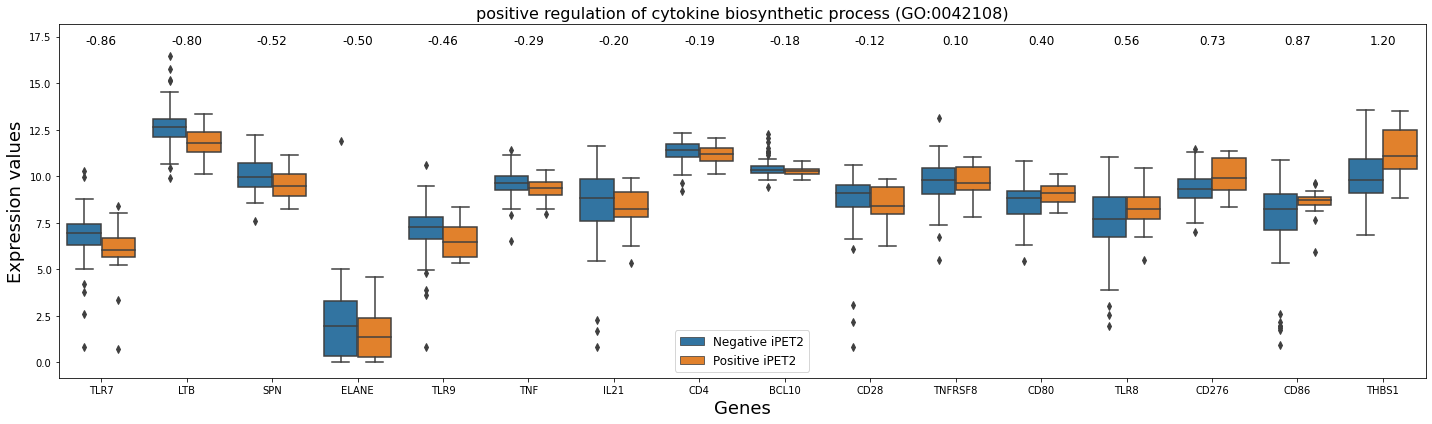

In [23]:
d = datasets["Union MIWI 0.1"]
n_terms = 3
#enrichr_func.scatter_genes_term(d, data, target, n_terms, diag_line=True, exp=False, use_axes=True)
#enrichr_func.fc_genes_term(d, data, target, n_terms)
enrichr_func.boxplot_genes_term(d, data, target, n_terms, figsize=(20,6), max_genes=20)

## Disease - OMIM_Disease

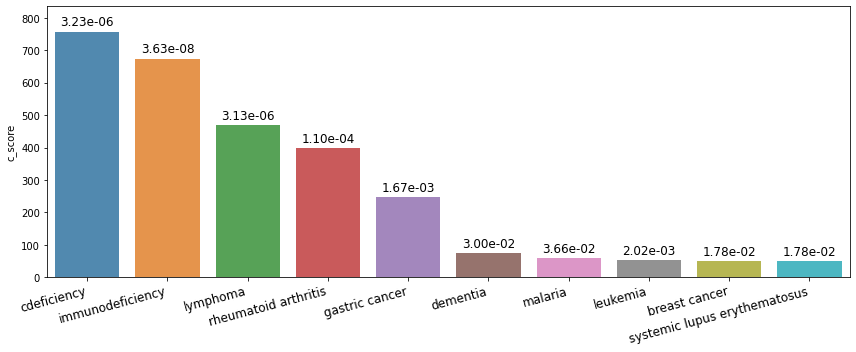

/home/andre/Desktop/tese/exploratory/myds/enrichr_func.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["over_genes"] = table["over_genes"].map(sorted).copy()


In [24]:
lib = "OMIM_Disease"
datasets = enrichr_func.term_graphics(sets, lib, titles=titles, orient="v", return_data=True, verbose=1,
                                      score=score, bar_score="adjusted_p_value",
                                      figsize=(12,5), rot=15, font_size=12, save=img_path+"bio_fs1disease")

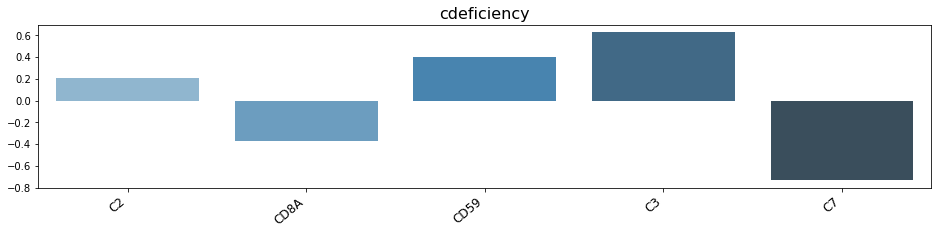

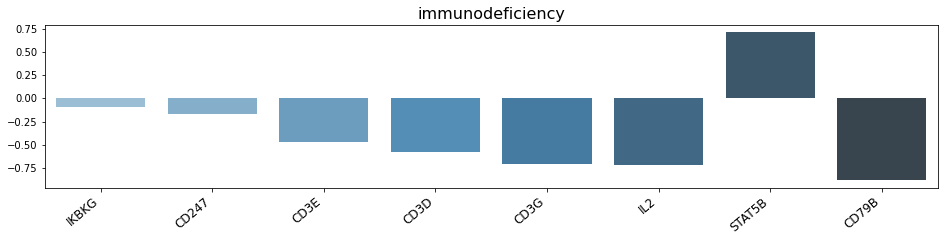

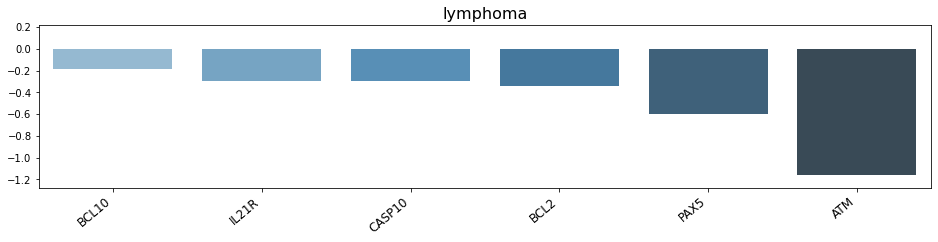

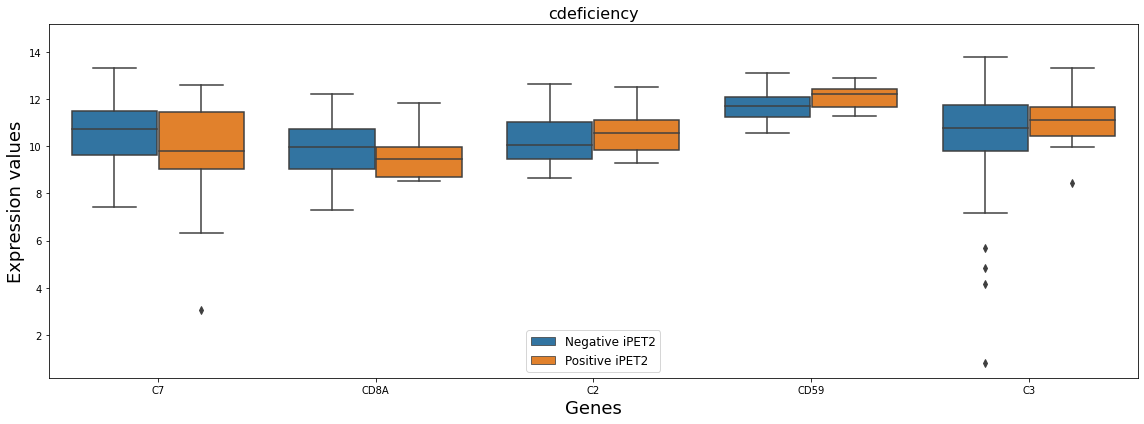

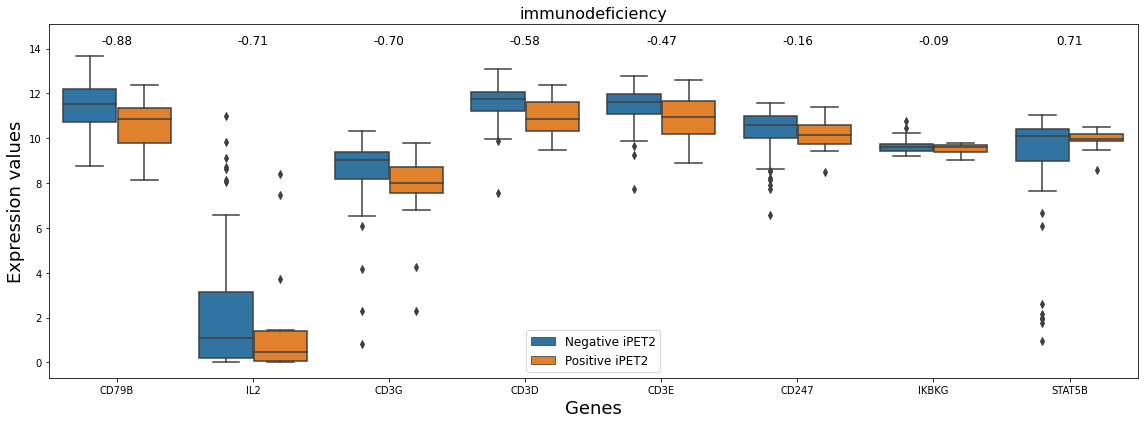

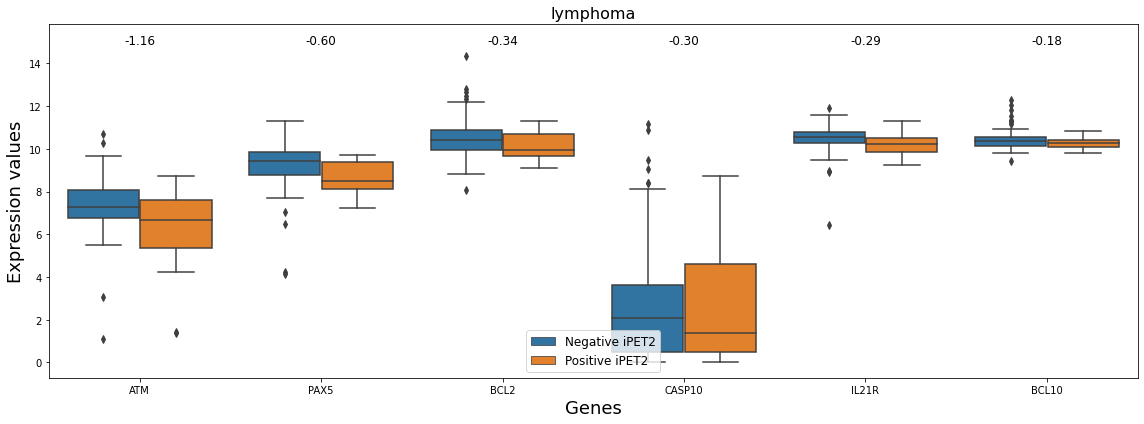

In [25]:
d = datasets["Union MIWI 0.1"]
n_terms = 3
#enrichr_func.scatter_genes_term(d, data, target, n_terms, diag_line=True, exp=False, use_axes=True)
enrichr_func.fc_genes_term(d, data, target, n_terms)
enrichr_func.boxplot_genes_term(d, data, target, n_terms, figsize=(16,6))

  # 2º Feature Selection

In [4]:
svm_genes = ['VEGFA', 'MFGE8', 'TLR5', 'CD80', 'SH2D1A', 'S100B', 'CXCL2', 'IL12RB1', 'HLA-C', 'CD8B', 'FCER2', 'CCL8', 'IL2', 'ENTPD1']

sets = {"SVM-RFE genes": svm_genes}
titles = []

## Pathway - KEGG_2019_Human

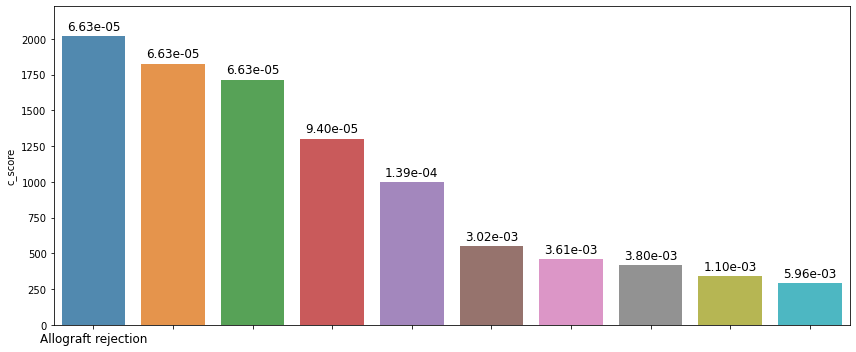

/home/andre/Desktop/tese/exploratory/myds/enrichr_func.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["over_genes"] = table["over_genes"].map(sorted).copy()


In [5]:
lib = 'KEGG_2019_Human'
datasets = enrichr_func.term_graphics(sets, lib, titles=titles, orient="v", return_data= True, verbose=1,
                                      score=score, bar_score="adjusted_p_value",
                                      figsize=(12,5), rot=15, font_size=12, save=img_path+"bio_fs2kegg")

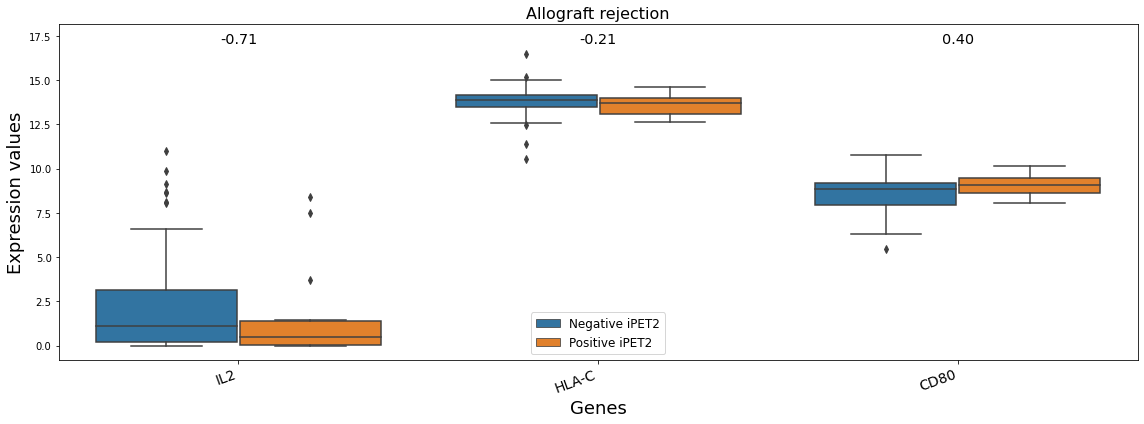

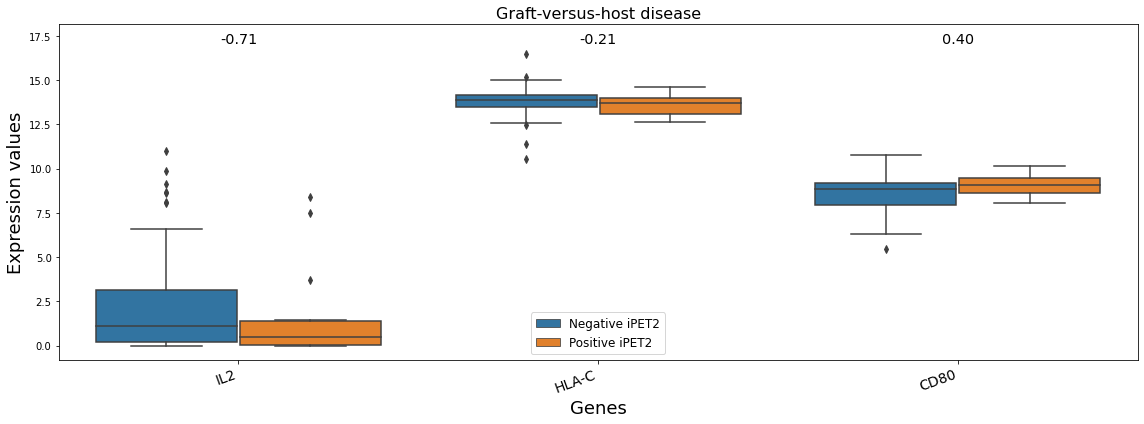

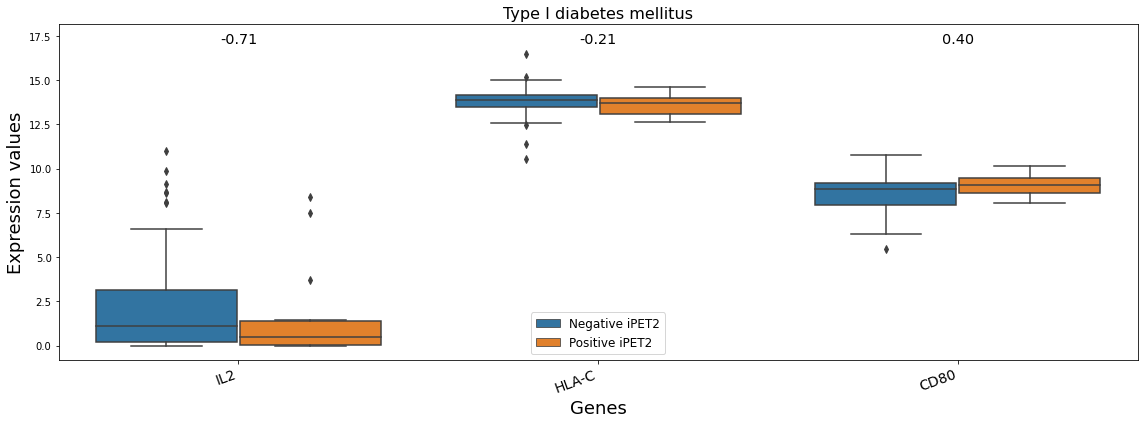

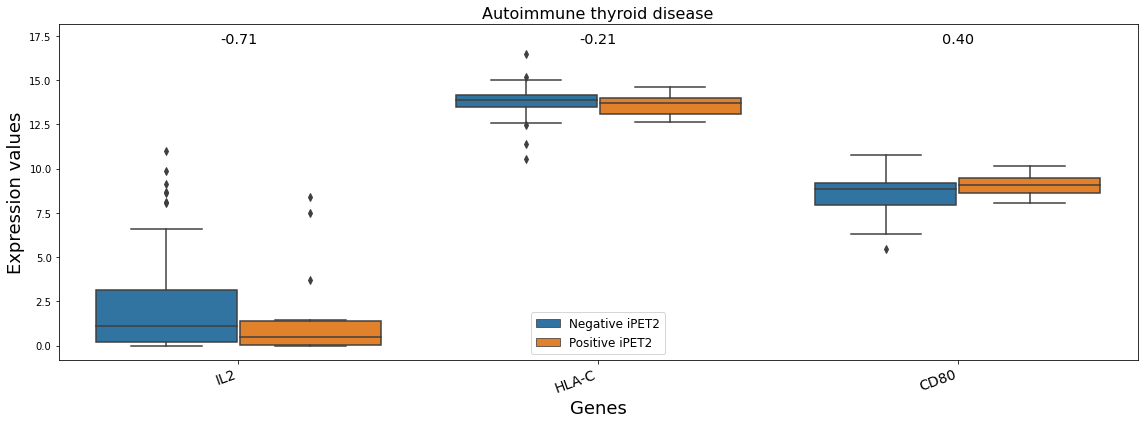

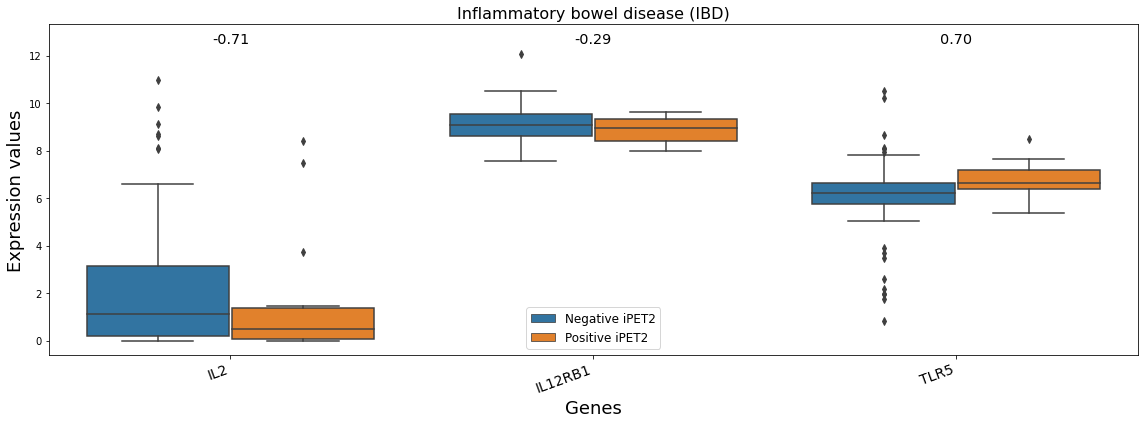

In [6]:
d = datasets["SVM-RFE genes"]
n_terms = 5
#enrichr_func.scatter_genes_term(d, data, target, n_terms, diag_line=True, exp=False, use_axes=True)
#enrichr_func.fc_genes_term(d, data, target, n_terms)
enrichr_func.boxplot_genes_term(d, data, target, n_terms, figsize=(16,6))

## Biological Process - GO_Biological_Process_2018

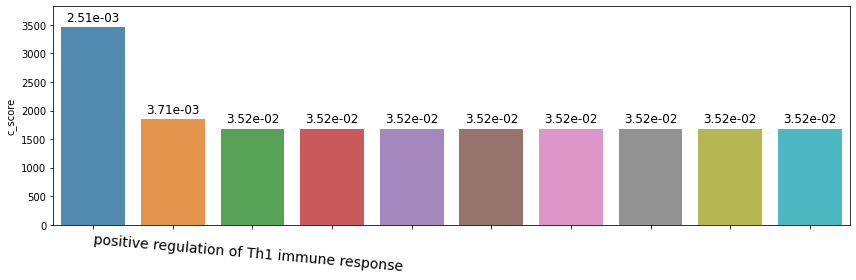

/home/andre/Desktop/tese/exploratory/myds/enrichr_func.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["over_genes"] = table["over_genes"].map(sorted).copy()


In [5]:
lib = "GO_Biological_Process_2018"
datasets = enrichr_func.term_graphics(sets, lib, titles=titles, orient="v", return_data= True, verbose=1,
                                      score=score, bar_score="adjusted_p_value",
                                      figsize=(12,4), rot=15, font_size=14, save=img_path+"bio_fs2bio")

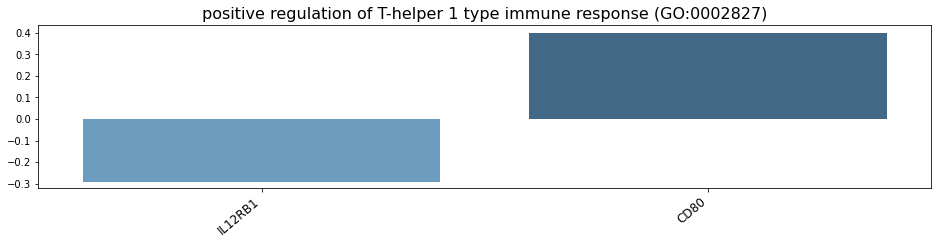

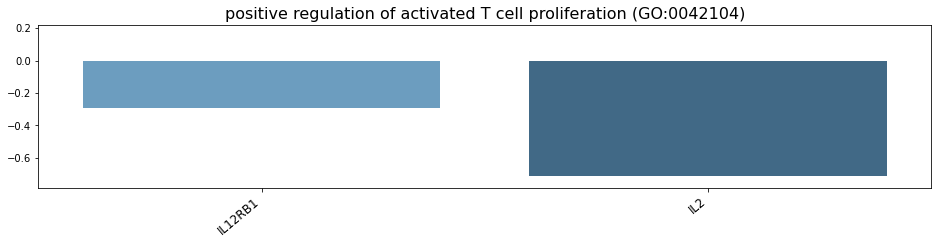

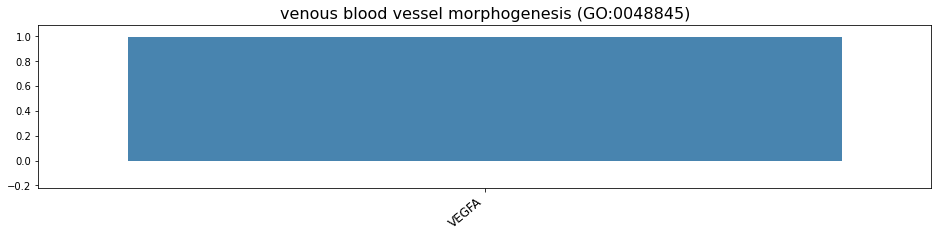

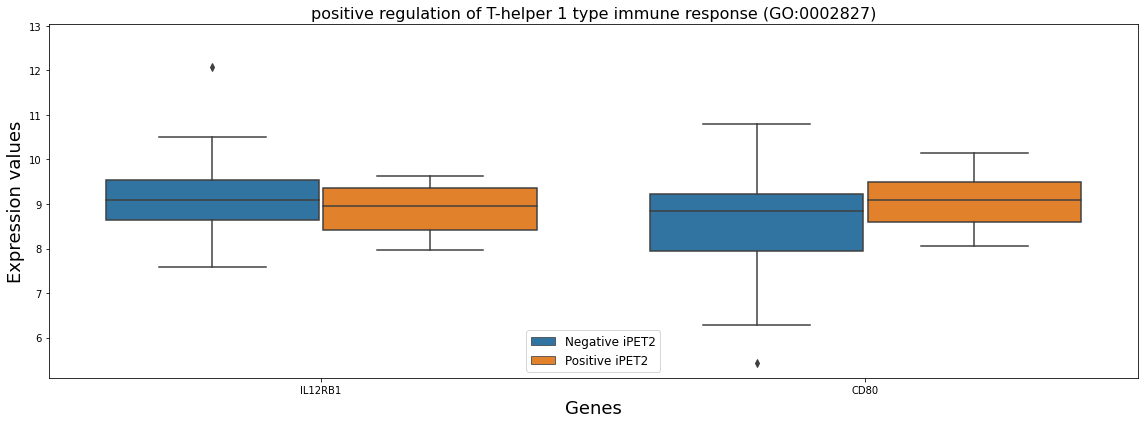

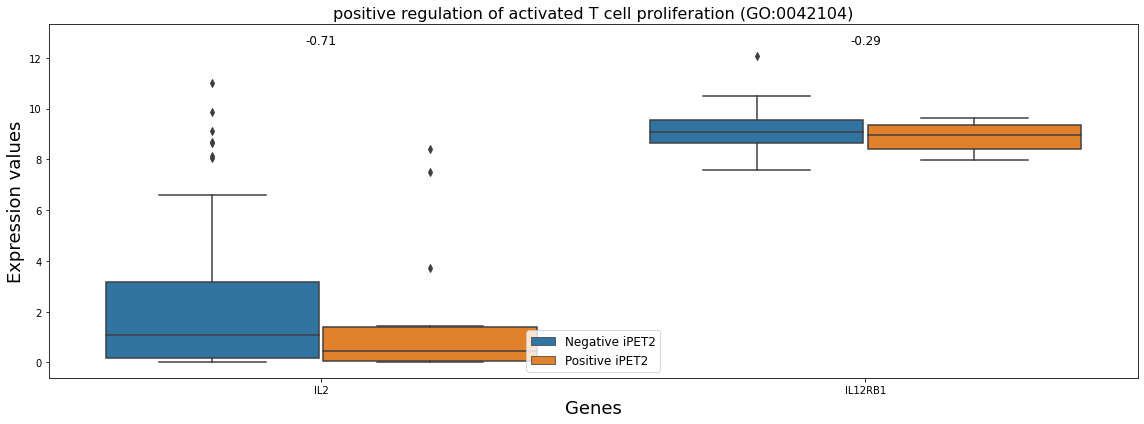

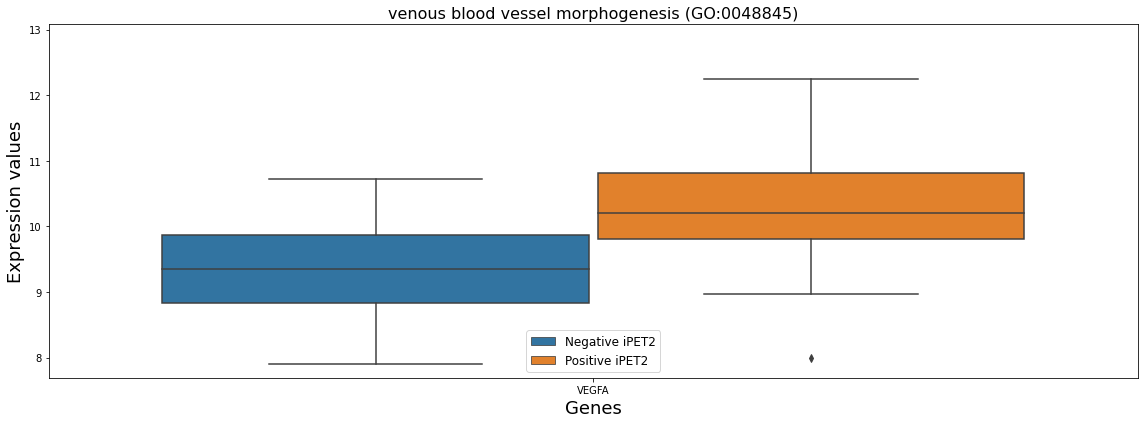

In [15]:
d = datasets["SVM-RFE genes"]
n_terms = 3
#enrichr_func.scatter_genes_term(d, data, target, n_terms, diag_line=True, exp=False, use_axes=True)
enrichr_func.fc_genes_term(d, data, target, n_terms)
enrichr_func.boxplot_genes_term(d, data, target, n_terms, figsize=(16,6))

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.flatten()
print(axes)
axes[0] = enrichr_func.boxplot_fc_genes(data, ["VEGFA"], target, ax=axes[0])


sns.histplot(x="VEGFA",hue=target, data=data, ax=axes[1], hue_order=None,
                     common_norm=False, stat="probability")
plt.show()

# BicPAMS Patterns

## Bigger than 14

In [ ]:
f = "dataset_forbic_9_1.3_250_10_True"
N = 20

file = "data/bic_patterns/" + f + ".json"
patterns = json.load(open(file, "r"))

for p in patterns:
    v = patterns[p]
    if len(v[0])>=14:
        print(f'{len(v[0])}\t{v[2]}')

In [ ]:
sets = {}
titles = []
for k in patterns:
    vals = patterns[k]
    if len(vals[0])>=14:
        print(k)
        print(list(zip(vals[0],vals[1])))
        print("#"*50)
        sets[str(k)] = vals[0]
        titles.append(str(k) + ": " + str(vals[:2]))
    if len(sets)==N: break
        
#titles = []

## Pathway Analysis - KEGG 2019 Human

In [ ]:
lib = 'KEGG_2019_Human'
datasets = enrichr_func.term_graphics(sets, lib, titles=titles, orient="v", return_data= True, verbose=1,
                                      score=score, bar_score="adjusted_p_value", n_single=3)

### One highlighted

In [ ]:
from myds.enrichr_func import create_list, get_enrichment 
library = 'KEGG_2019_Human'
sets_t = {"18": sets["18"], "37": sets["37"]}
#s1 = sets["18"]
#s2 = sets["37"]
#titles_t= [f"Genes: {s1}\nValues: [1,23,4,5,6,7,8,9]", f"Genes: {s2}\nValues: [1,23,4,5,6,7,8,9]"]
orient="v"
bar_score = "adjusted_p_value"
n_single=3
figsize=(16,6)
alpha = 0.85
font_size="medium"
rot = 10

ascending = False if score=="c_score" else True
ids = {k: create_list(v) for k,v in sets_t.items()}
datasets = {k: get_enrichment(ids[k], library, as_dataset=True).sort_values(score, ascending=ascending) for k in ids.keys()}
for k in datasets:
    datasets[k]["-log10(p-value)"] = - np.log10(datasets[k]["adjusted_p_value"])

if score == "adjusted_p_value": score = "-log10(p-value)"
columns = datasets[list(datasets.keys())[0]].columns
x = "term"
y = score
#single graphics

fig, axes = plt.subplots(1,2,figsize=figsize)
axes = axes.flatten()
for i, k in enumerate(datasets.keys()):
    print(i)
    d = datasets[k]

    d["set"] = k
    df = d.sort_values(score, ascending=False).head(n_single)

    if orient=="h":
        x = score
        y = "term"
        rot=0

    sns.barplot(x=x, y=y, data=df, orient=orient, alpha=alpha, ax=axes[i])
    ymin, ymax = axes[i].get_ylim()
    axes[i].set_ylim(ymin, ymax*1.05)
    ##annotation###################
    rects = axes[i].patches
    v = df[bar_score].apply(lambda x: '{:.2e}'.format(x)).tolist()
    plot.autolabel(axes[i], rects, v, threshold=0, percentage=False, orient=orient)
    ###############################
    if orient=="v":
        axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=font_size, rotation=rot, ha="right")
        axes[i].set_xlabel("")
    if len(titles_t)>0: axes[i].set_title(titles_t[i])

plt.show()

### Leukemia

In [ ]:
from myds.enrichr_func import create_list, get_enrichment 
library = 'KEGG_2019_Human'
sets_t = {"2": sets["2"]}
s1 = sets["2"]
titles_t= [f"Genes: {s1}\nValues: [1,23,4,5,6,7,8,9]"]
orient="v"
bar_score = "adjusted_p_value"
n_single=3
figsize=(10,5)
alpha = 0.85
font_size="large"
rot = 10

ascending = False if score=="c_score" else True
ids = {k: create_list(v) for k,v in sets_t.items()}
datasets = {k: get_enrichment(ids[k], library, as_dataset=True).sort_values(score, ascending=ascending) for k in ids.keys()}
for k in datasets:
    datasets[k]["-log10(p-value)"] = - np.log10(datasets[k]["adjusted_p_value"])

if score == "adjusted_p_value": score = "-log10(p-value)"
columns = datasets[list(datasets.keys())[0]].columns
x = "term"
y = score
#single graphics
for i, k in enumerate(datasets.keys()):
    d = datasets[k]

    d["set"] = k
    df = d.sort_values(score, ascending=False).head(n_single)

    if orient=="h":
        figsize = (figsize[1], figsize[0])
        x = score
        y = "term"
        rot=0

    plt.figure(figsize=figsize)
    ax_r = sns.barplot(x=x, y=y, data=df, orient=orient, alpha=alpha)
    ymin, ymax = ax_r.get_ylim()
    ax_r.set_ylim(ymin, ymax*1.05)
    ##annotation###################
    rects = ax_r.patches
    v = df[bar_score].apply(lambda x: '{:.2e}'.format(x)).tolist()
    plot.autolabel(ax_r, rects, v, threshold=0, percentage=False, orient=orient)
    ###############################
    if orient=="v":
        ax_r.set_xticklabels(ax_r.get_xticklabels(), fontsize=font_size, rotation=rot, ha="right")
        ax_r.set_xlabel("")
    if len(titles_t)>0: ax_r.set_title(titles_t[i])
    plt.tight_layout()
    plt.show()

### random

In [ ]:
from myds.enrichr_func import create_list, get_enrichment 
library = 'KEGG_2019_Human'
sets_t = {"30": sets["30"], "52": sets["52"]}
s1 = sets["30"]
s2 = sets["52"]
titles_t= [f"Genes: {s1}\nValues: [1,23,4,5,6,7,8,9]", f"Genes: {s2}\nValues: [1,23,4,5,6,7,8,9]"]
orient="v"
bar_score = "adjusted_p_value"
n_single=3
figsize=(16,6)
alpha = 0.85
font_size="medium"
rot = 10

ascending = False if score=="c_score" else True
ids = {k: create_list(v) for k,v in sets_t.items()}
datasets = {k: get_enrichment(ids[k], library, as_dataset=True).sort_values(score, ascending=ascending) for k in ids.keys()}
for k in datasets:
    datasets[k]["-log10(p-value)"] = - np.log10(datasets[k]["adjusted_p_value"])

if score == "adjusted_p_value": score = "-log10(p-value)"
columns = datasets[list(datasets.keys())[0]].columns
x = "term"
y = score
#single graphics

fig, axes = plt.subplots(1,2,figsize=figsize)
axes = axes.flatten()
for i, k in enumerate(datasets.keys()):
    print(i)
    d = datasets[k]

    d["set"] = k
    df = d.sort_values(score, ascending=False).head(n_single)

    if orient=="h":
        x = score
        y = "term"
        rot=0

    sns.barplot(x=x, y=y, data=df, orient=orient, alpha=alpha, ax=axes[i])
    ymin, ymax = axes[i].get_ylim()
    axes[i].set_ylim(ymin, ymax*1.05)
    ##annotation###################
    rects = axes[i].patches
    v = df[bar_score].apply(lambda x: '{:.2e}'.format(x)).tolist()
    plot.autolabel(axes[i], rects, v, threshold=0, percentage=False, orient=orient)
    ###############################
    if orient=="v":
        axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=font_size, rotation=rot, ha="right")
        axes[i].set_xlabel("")
    if len(titles_t)>0: axes[i].set_title(titles_t[i])

plt.show()

## BicPAMS from feature importance
![title](images/feature_importance/dataset_forbic_9_1.3_250_10_True_nb_plot.png)

In [ ]:
p = ["133", "27", "9570", "275", "10363"]

sets = {}
titles = []
for k in p:
    vals = patterns[k]
    print(f'{vals[0]} - {vals[2]} - {k}')
    sets[str(k)] = vals[0]
    titles.append(str(vals[:2]))

In [ ]:
lib = 'KEGG_2019_Human'
datasets = enrichr_func.term_graphics(sets, lib, titles=titles, orient="v", return_data= True, verbose=2,
                                      score=score, bar_score="adjusted_p_value", n_single=3)

# Inflammation driven by tumour-specific Th1 cells protects agains B-cell cancer

In [ ]:
gene_list = ["IL1A", "IL1B", "IL6", "IL2", "IL3", "IL12B", "IFNG", "CXCL9", "CXCL10"]
data_feats = data.columns

for g in gene_list:
    print(f"{g} - {g in data_feats}")
    
fig, axes = plt.subplots(1,1, figsize=(12,6))
enrichr_func.boxplot_fc_genes(data, gene_list, target, ax=axes)

In [ ]:
#Th2 characteristic genes
gene_list = ["IL4", "IL5", "IL9", "IL13", "IL25"]
data_feats = data.columns

for g in gene_list:
    print(f"{g} - {g in data_feats}")
    
fig, axes = plt.subplots(1,1, figsize=(12,6))
enrichr_func.boxplot_fc_genes(data, gene_list, target, ax=axes)

# Predictors analysis

## Feature importance

#### Feature importance de XGB and RF no dataset Union1
![title](images/feature_importance/dataset_union1_xgb_plot.png)
![title](images/feature_importance/dataset_union1_rf_plot.png)

PLAUR destaca-se, alinha com o RF-based que só retornava este gene. Decision Tree based gostam deste.



dataset_union1.csv


Using already calculated parameters
feat_imp


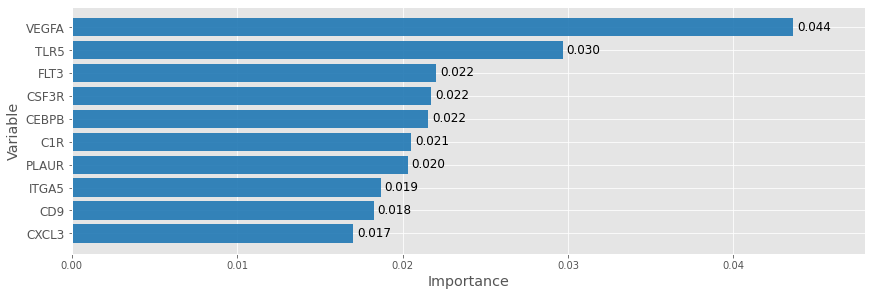

In [13]:
import json
import os
import warnings
from functools import partial
from operator import itemgetter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SVMSMOTE, RandomOverSampler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
import xgboost as xgb
import pickle

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from myds import evaluation as eval
from myds import datapreprocessing as datapp
from myds import optimize, plot

import tqdm
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, cohen_kappa_score, roc_auc_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import random
import numpy as np

#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings('ignore')

def custom_recall_join(y, ypred):
    y = np.where(y==2, 1, y)
    ypred = np.where(ypred == 2, 1, ypred)
    return metrics.recall_score(y, ypred, zero_division=0)

rs = 2345


# number of max evaluations when looking for optimal parameters
MAX_EVALS = 300
# number of max evaluations when looking for optimal parameters
early = MAX_EVALS//2

n_feat = 10
n_feat_mult = 10
dpi = 300
figsize = (12, 4)
data_dir = "./data/"
file_dir = "./files/feat_importance/"
id = "id"

datasets = ["dataset_union1.csv"]
for f in datasets:
    if not os.path.exists(data_dir + f): raise Exception(f"File {f} not found")


targets = ["ipet2"]
targets = targets * len(datasets)


# balancing and scaling (respectively) for each case
preprocessing = [(None, None)]
preprocessing = preprocessing * len(datasets)

to_scale = [[]]
to_scale = to_scale * len(datasets)

# to optimize
to_optimize = [({"score": f1_score},)]
to_optimize = to_optimize * len(datasets)

#####Calculate models###############################################33
var_name = {"ASTH": "Asthma"}

plt.style.use('ggplot')

models = [xgb.XGBClassifier]
models = [RandomForestClassifier]
model_names = ["xgb"]
model_names = ["rf"]

decimals = [3]
show_neg = False

for k in range(len(models)):
    feat_imps = {}
    model_name = model_names[k]
    decimal = decimals[k]
    for i in range(0, len(datasets)):
        model = models[k]

        #get data
        path = data_dir + datasets[i]
        print("\n\n"+datasets[i]+"\n\n")
        data = pd.read_csv(path)
        data = data.set_index(id)
        target = targets[i]
        columns = data.drop(columns=[target]).columns
        nclasses = len(data[target].value_counts())
        y = data[target].values
        X = data.drop([target], axis=1).values

        if n_feat == -1 or n_feat > X.shape[1]:
            n_feat = X.shape[1]

        metric = to_optimize[i]
        balancing, scaling = preprocessing[i]
        feature_scale = to_scale[i]
        optm_classifs = {0: [], 1: []}

        X_train, y_train = eval.transform_data(data, target, None, None, [])

        for z in [0]:#range(0, len(metric)):
            param_file_name = datasets[i].replace(".csv", f"_{model_name}_param_calc.json")
            try:
                f = open(file_dir + param_file_name, "r")
                params = json.load(f)
                print("Using already calculated parameters")
            except FileNotFoundError:
                print("Calculating new parameters")
                space_restrit = {'kernel': "linear"} if model == SVC else None
                params = optimize.optimize_model(model, data, target, metric[z], balancing, scaling, feature_scale,
                                                 MAX_EVALS, space_restriction=space_restrit,k=5, early_stop=early,
                                                 rs=rs, verbose=True)
                f = open(file_dir + param_file_name, "w")
                json.dump(params, f)
            finally:
                f.close()


            params["random_state"] = rs
            #params = {} #DEBUG

            model = model(**params)
            model.fit(X_train, y_train)

            try:
                feat_imps[i] = model.feature_importances_
                lim = True
                print("feat_imp")
            except AttributeError:
                feat_imps[i] = np.std(X_train, axis=0) * model.coef_[0]
                if not show_neg:
                    feat_imps[i] = abs(feat_imps[i])
                lim = False
                print("coef")


            #feat_imps[i][0] = - feat_imps[i][0]

            tops = abs(feat_imps[i]).argsort()[-n_feat:]
            fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)
            vals = feat_imps[i][tops]
            colors = ["tab:blue" if a>=0 else "tab:purple" for a in vals]
            rects = plt.barh(np.arange(n_feat), abs(vals), color=colors, alpha=0.9)
            ax.set_yticks(np.arange(n_feat))
            names = columns[tops].tolist()
            #names = [var_name[n] for n in names]
            ax.set_yticklabels(names, fontsize="large")
            ax.set_title('')
            #if lim: ax.set_xlim(0, 1)
            ax.set_xlim(0, max(abs(feat_imps[i])) * 1.1)
            ax.set_ylabel("Variable", fontsize="x-large")
            ax.set_xlabel("Importance", fontsize="x-large")


            #v = [round(i, 4) for i in vals]
            plot.autolabel(ax, rects, vals, decimal=decimal, threshold=-100, percentage=False, orient="h")

            path = "./images/feature_importance/" + datasets[i].replace(".csv", f"_{model_name}_plot.png")
            #plt.tight_layout()
            #plt.show()
            fig.savefig(path, format='png', dpi=dpi)

            #save parameters in json file


    #save dict with importances
    path = data_dir + datasets[0]
    data = pd.read_csv(path)
    data = data.set_index(id)
    target = targets[0]
    columns = data.drop(columns=[target]).columns

    to_save = {}
    for k in feat_imps.keys():
        to_save[k] = feat_imps[k].tolist()
    file_name = f"feature_importances_{model_name}.json"
    file_dict = open(file_dir  + file_name, "w")
    json.dump(to_save, file_dict)
    file_dict.close()


## Tree analysis

In [16]:
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree
from subprocess import call

file = "dataset_union1.csv"
df = pd.read_csv(f"data/{file}").set_index(id)

y = df[target].values
X = df.drop(columns=[target]).values
features = df.columns.drop(target)
classes = ["Negative", "Positive"]

clf = DecisionTreeClassifier(random_state=123)
clf.fit(X, y)

DecisionTreeClassifier(random_state=123)

In [17]:
from inspect import signature

help(dtreeviz)
#signature(dtreeviz)

Help on function dtreeviz in module dtreeviz.trees:

dtreeviz(tree_model, x_data: (<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>) = None, y_data: (<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>) = None, feature_names: List[str] = None, target_name: str = None, class_names: (typing.Mapping[numbers.Number, str], typing.List[str]) = None, tree_index: int = None, precision: int = 2, orientation: ('TD', 'LR') = 'TD', instance_orientation: ('TD', 'LR') = 'LR', show_root_edge_labels: bool = True, show_node_labels: bool = False, show_just_path: bool = False, fancy: bool = True, histtype: ('bar', 'barstacked', 'strip') = 'barstacked', highlight_path: List[int] = [], X: numpy.ndarray = None, max_X_features_LR: int = 10, max_X_features_TD: int = 20, label_fontsize: int = 12, ticks_fontsize: int = 8, fontname: str = 'Arial', title: str = None, title_fontsize: int = 14, colors: dict = None, scale=1.0) -> dtreeviz.trees.DTreeViz
    Given a decision tree regressor or

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


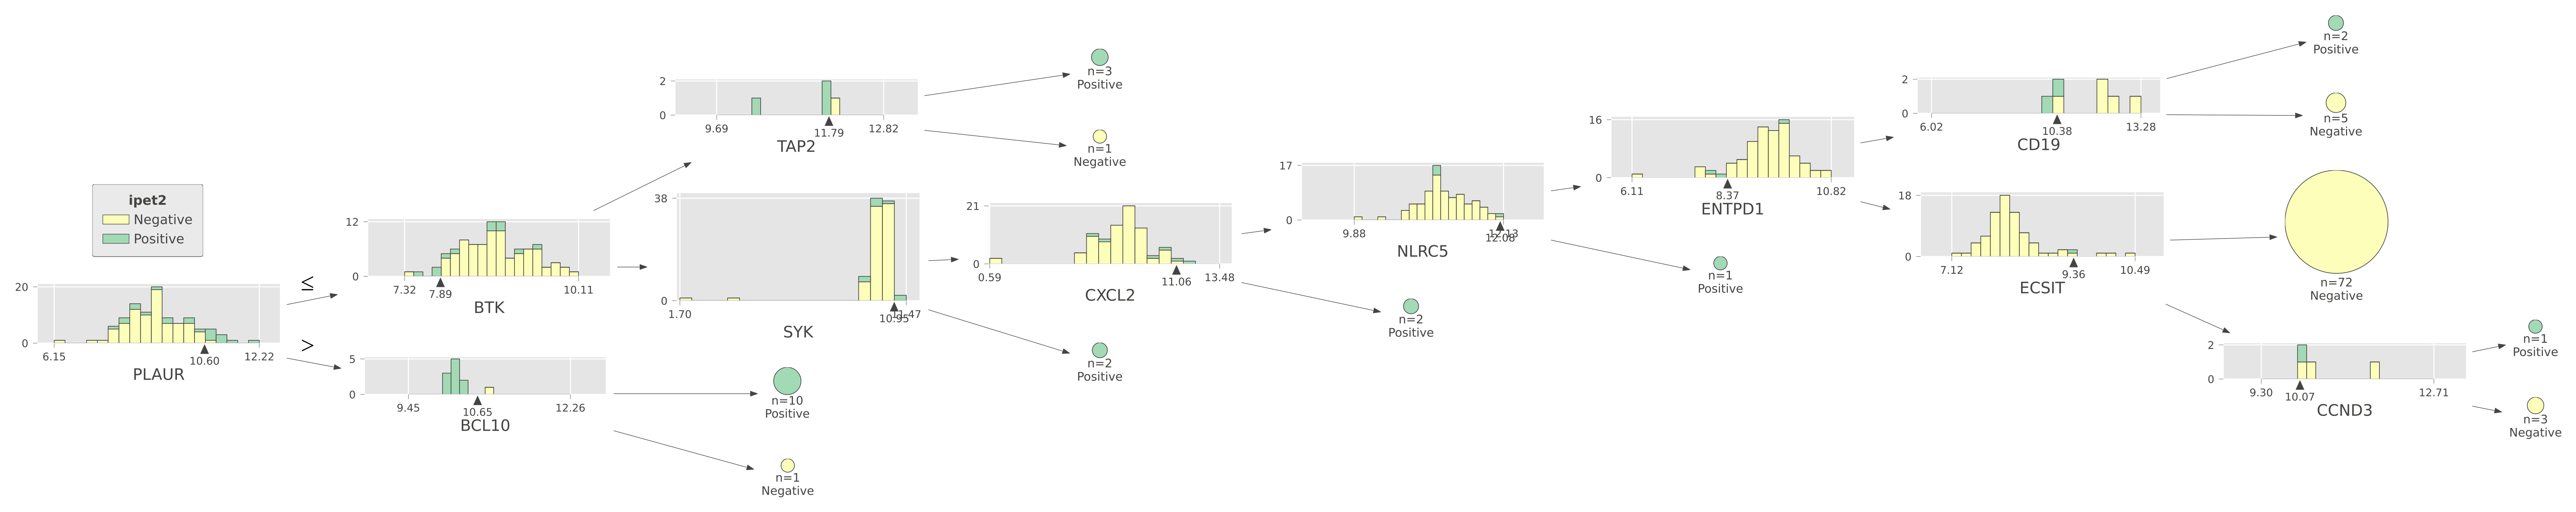

<Figure size 864x864 with 0 Axes>

In [18]:
from dtreeviz.trees import dtreeviz, ctreeviz_univar, ctreeviz_bivar
p = "./images/exploratory/notebook_tree"

fig = plt.figure(figsize=(12,12))
viz = dtreeviz(clf, X, y,
                target_name=target,
                feature_names=features,
                orientation ='LR',
                scale=5,
                class_names=["Negative", "Positive"])
print(viz)
viz.save(f"{p}.svg")
with open(f"{p}.svg", "rb") as f:
    svg2png(file_obj=f, write_to=f"{p}.png")

os.remove(f"{p}.svg")
os.remove(f"{p}")

Image(filename=f'{p}.png') 

0.8891463414634142


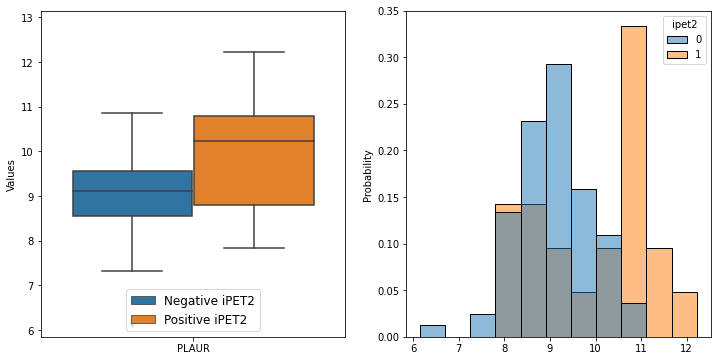

In [31]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.flatten()

axes[0] = enrichr_func.boxplot_fc_genes(data, ["PLAUR"], target, ax=axes[0])
axes[0].set_xlabel("")
axes[0].set_ylabel(axes[0].get_ylabel(), fontsize="medium")

sns.histplot(x="PLAUR",hue=target, data=data, ax=axes[1], hue_order=None,
                     common_norm=False, stat="probability")
axes[1].set_xlabel("")

plt.show()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.flatten()

axes[0] = enrichr_func.boxplot_fc_genes(data, ["BTK"], target, ax=axes[0])
axes[0].set_xlabel("")
axes[0].set_ylabel(axes[0].get_ylabel(), fontsize="medium")

sns.histplot(x="BTK",hue=target, data=data, ax=axes[1], hue_order=None,
                     common_norm=False, stat="probability")
axes[1].set_xlabel("")

plt.show()

In [ ]:
genes = ["CD19", "CD22", "CD24", "CD80", "CD9", "CR2", "CSF3R", "FCER2", "HLA-C", "IL1R1", "IL2", "IL6", "ITGA1", "ITGA5", "VEGFA"]
fig, axes = plt.subplots(1,1, figsize=(12,6))
enrichr_func.boxplot_fc_genes(data, genes, target, ax=axes)
fig.show()